## 前情函数

### tf.reduce_mean()
tf.reduce_mean() 是 tf.math 库中的函数，两个名称等价  

tf.math.reduce_mean(  
&ensp;&ensp;&ensp;&ensp;input_tensor,  
&ensp;&ensp;&ensp;&ensp;axis=None,  
&ensp;&ensp;&ensp;&ensp;keepdims=None,  
&ensp;&ensp;&ensp;&ensp;name=None,  
&ensp;&ensp;&ensp;&ensp;reduction_indices=None,  
&ensp;&ensp;&ensp;&ensp;keep_dims=None  
)  
  
input_tensor: 输入值为张量  
axis: 求均值的轴向，默认为 None，默认对所有轴向求均值，其轴取值范围为 [-rank(input_tensor), rank(input_tensor))  
keepdims: 如果为true，则保留长度为1的缩小尺寸  
name: 命名  
reduction_indices: 轴向的旧名称(不推荐使用)  
keep_dims: keepdims 旧名称，不推荐使用  
**主要掌握 input_tensor 与 axis 就够了**  

返回一个张量值  
**tf.reduce_mean()是一个求均值操作，可以对为指定的具体值执行均值操作**

In [1]:
import tensorflow as tf
import numpy as np


x = tf.constant([[1., 1.], [2., 2.], [3., 4.]])
a = tf.reduce_mean(x)
b = tf.reduce_mean(x, 0)
c = tf.reduce_mean(x, 1)
y = tf.placeholder(tf.float32, shape=(3, 3, 4))
sess = tf.Session()

print('a value:', sess.run(a))
print('b value:', sess.run(b))
print('c value:', sess.run(c))

y_mean = tf.reduce_mean(y)

sess.close()

del y

a value: 2.1666667
b value: [2.        2.3333333]
c value: [1.  2.  3.5]


### tf.gradients  
tf.gradients(  
&ensp;&ensp;&ensp;&ensp;ys,  
&ensp;&ensp;&ensp;&ensp;xs,  
&ensp;&ensp;&ensp;&ensp;grad_ys=None,  
&ensp;&ensp;&ensp;&ensp;name='gradients',  
&ensp;&ensp;&ensp;&ensp;colocate_gradients_with_ops=False,  
&ensp;&ensp;&ensp;&ensp;gate_gradients=False,  
&ensp;&ensp;&ensp;&ensp;aggregation_method=None,  
&ensp;&ensp;&ensp;&ensp;stop_gradients=None,  
&ensp;&ensp;&ensp;&ensp;unconnected_gradients=tf.UnconnectedGradients.NONE  
)  
函数作用为求梯度  
ys，xs: 输入张量值  
stop_gradients: 求偏导还是求全导，需要在变量之间具有转换关系  
unconnected_gradients :没有联系的参数，这种求导一般为 None ，可用 unconnected_gradients 指定，让求导结果为 0    

对c使用stop_gradients参数，c与b就没有联系，因此对b求导为1.0

In [2]:
a = tf.constant(0.)
b = 2 * a
c = 3 * b
g = tf.gradients(a + b + c, [a, b, c], stop_gradients=[c])

tf.Session().run(g)

[3.0, 1.0, 1.0]

a与b与c有联系，b与a没联系，b与c有联系，c与b与a无联系，根据 `b = 2 * a，c = 3 * b` 对a就是9a，对b就是4b，对c就是1c

In [3]:
a = tf.constant(0.)
b = 2 * a
c = 3 * b
g = tf.gradients(a + b + c, [a, b, c])

tf.Session().run(g)

[9.0, 4.0, 1.0]

stop_gradient 也可以进行单独指定

In [4]:
a = tf.stop_gradient(tf.constant(0.))
b = tf.stop_gradient(2 * a)
g = tf.gradients(a + b, [a, b])

tf.Session().run(g)

[1.0, 1.0]

In [5]:
a = tf.constant(0.)
b = 2 * a
c = 3 * b
g = tf.gradients(a + b + c, [a, b, c])[0]

tf.Session().run(g)

9.0

In [6]:
a = tf.ones([1, 2])
b = tf.ones([3, 1])

try:
    g1 = tf.gradients([b], [a], unconnected_gradients='none')
    print(tf.Session().run(g1))
except TypeError:
    print('TypeError: Fetch argument None has invalid type <class \'NoneType\'>')
finally:
    g2 = tf.gradients([b], [a], unconnected_gradients='zero')
    tf.Session().run(g2)
    print(tf.Session().run(g2))

TypeError: Fetch argument None has invalid type <class 'NoneType'>
[array([[0., 0.]], dtype=float32)]


### numpy.clip() 与 numpy 的 std()
numpy.clip(a, a_min, a_max, out=None)
作用将 数据限制在一个范围，小于 a_min 为 a_min，大于 a_max 为 a_max  
a_min: 输入的数据，可以是列表，int 等可识别类型  
a_max: 输入的数据，可以是列表，int 等可识别类型  

std() 用于求标准差

list clip 的每一个对应数据限制在 list 相应数据与 8 之间

In [7]:
a = np.arange(10)
print('a value:\n', a)
print('a clip 4~7:\n', a.clip(4, 7))
print('list clip:\n',a.clip([3, 4, 1, 4, 1, 4, 4, 4, 4, 4], 8))

a = np.array([[1, 3], [4, 5]])
print('a value:\n', a)
print('a std:', a.std())

a value:
 [0 1 2 3 4 5 6 7 8 9]
a clip 4~7:
 [4 4 4 4 4 5 6 7 7 7]
list clip:
 [3 4 2 4 4 5 6 7 8 8]
a value:
 [[1 3]
 [4 5]]
a std: 1.479019945774904


### numpy.roll()
numpy.roll(a, shift, axis=None)  
a : 输入的 array  
shift : 移动的值，可以是整数，也可以是元组，元组需与轴对应  
axis : 操作的轴  

返回值为 array  

In [8]:
x = np.arange(15)
print('x value:\n', x)
print('np.roll(x, 2):\n', np.roll(x, 2))
print('np.roll(x, -2):\n', np.roll(x, -2))

x value:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
np.roll(x, 2):
 [13 14  0  1  2  3  4  5  6  7  8  9 10 11 12]
np.roll(x, -2):
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14  0  1]


In [9]:
x2 = np.reshape(x, (3,5))
print('x value:\n', x2)
print('np.roll(x2, 1):\n', np.roll(x2, 1))
print('np.roll(x2, 1, axis=0):\n', np.roll(x2, 1, axis=0))
print('np.roll(x2, 1, axis=1):\n', np.roll(x2, 1, axis=1))
print('np.roll(x2, (1, 1)):\n', np.roll(x2, (1, 1)))

x value:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
np.roll(x2, 1):
 [[14  0  1  2  3]
 [ 4  5  6  7  8]
 [ 9 10 11 12 13]]
np.roll(x2, 1, axis=0):
 [[10 11 12 13 14]
 [ 0  1  2  3  4]
 [ 5  6  7  8  9]]
np.roll(x2, 1, axis=1):
 [[ 4  0  1  2  3]
 [ 9  5  6  7  8]
 [14 10 11 12 13]]
np.roll(x2, (1, 1)):
 [[13 14  0  1  2]
 [ 3  4  5  6  7]
 [ 8  9 10 11 12]]


### tf.expand_dims()
作用是增加一个维度，numpy 也具有同样功能的函数  
tf.expand_dims(  
&ensp;&ensp;&ensp;&ensp;input,  
&ensp;&ensp;&ensp;&ensp;axis=None,  
&ensp;&ensp;&ensp;&ensp;name=None,  
&ensp;&ensp;&ensp;&ensp;dim=None  
)  
input: 输入张量  
axis: 标量，指定具体拓展的维度，其值范围为 range[-rank(input) - 1, rank(input)]  
name: 命名  
dim: 与 axis 相同，但不推荐使用  
返回与输入同类型张量  
  
**站长警告: 不推荐使用 dim，它将在以后的版本中删除，改用axis参数**

In [10]:
import tensorflow as tf
import numpy as np

demo = [[2, 3, 4], [1, 5, 5]]
print('demo_shape:', np.shape(demo))

demo_shape: (2, 3)


增加第零维度

In [11]:
demo1 = tf.expand_dims(demo, 0)
print('demo1_shape:', np.shape(demo1))

demo1_shape: (1, 2, 3)


增加第一维度

In [12]:
demo2 = tf.expand_dims(demo, 1)
print('demo2_shape:', np.shape(demo2))

demo2_shape: (2, 1, 3)


增加第二维度

In [13]:
demo3 = tf.expand_dims(demo, 2)
print('demo3_shape:', np.shape(demo3))

demo3_shape: (2, 3, 1)


增加最后一维度(第二维度)

In [14]:
demo4 = tf.expand_dims(demo, -1)
print('demo4_shape:', np.shape(demo4))

demo4_shape: (2, 3, 1)


### 图保存与加载

图的保存

In [15]:
variable = tf.Variable(1.0, name='my_variable')
with tf.Session() as sess:
    tf.train.write_graph(sess.graph_def, './tfmodel', 'test_pb.pb', as_text=False)

图的加载

In [16]:
with tf.Session() as sess:
    with tf.gfile.FastGFile('./tfmodel/test_pb.pb', 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        sess.graph.as_default()
        tf.import_graph_def(graph_def, name='tf.graph')
        print(graph_def)

Instructions for updating:
Use tf.gfile.GFile.
node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 3
          }
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\200?\000\000\200?\000\000\000@\000\000\000@\000\000@@\000\000\200@"
      }
    }
  }
}
node {
  name: "Const_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\000\000\001\000\000\000"
      }
    }
  }
}
node {
  name: "Mean"
  op: "Mean"
  input: "Const"
  input: "Const_1"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "Tidx"
    value {
 

### 创建、重置、获得默认图

In [17]:
g = tf.Graph()
with g.as_default():
    c1 = tf.constant(0.0)
    print(c1)
    print('c1.graph:', c1.graph)

Tensor("Const:0", shape=(), dtype=float32)
c1.graph: <tensorflow.python.framework.ops.Graph object at 0x000002692EFB05F8>


In [18]:
tf.reset_default_graph()
g2 = tf.get_default_graph()
print('g2:', g2)

g2: <tensorflow.python.framework.ops.Graph object at 0x000002692EFB0470>


### 获取张量 get_tensor_by_name()
通过 .name 操作获取张量的名字，因此我们不必关注 TensorFlow 的默认命名规则，我们可以指定名称，就算不知道也可以根据 .name 操作打印其名称，DeepDream 一般步骤为先获取张量名，再将张量名回填到输入操作中

In [19]:
print('Name:', c1.name)

Name: Const:0


In [20]:
t = g.get_tensor_by_name(name='Const:0')
print(t)

Tensor("Const:0", shape=(), dtype=float32)


指定名称

In [21]:
g_name = tf.Graph()
with g_name.as_default():
    c1_name = tf.constant(0.0, name='c1_name')
    print(c1_name)
    print('c1_name.graph:', c1_name.graph)

print('Name:', c1_name.name)

t_name = g_name.get_tensor_by_name(name='c1_name:0')
print(t_name)

Tensor("c1_name:0", shape=(), dtype=float32)
c1_name.graph: <tensorflow.python.framework.ops.Graph object at 0x00000269300C49B0>
Name: c1_name:0
Tensor("c1_name:0", shape=(), dtype=float32)


### 获取节点操作 get_operation_by_name
DeepDream 一般步骤为先获取操作名，再将操作名回填到输入操作中

In [22]:
a = tf.constant([[1.0, 2.0]])
b = tf.constant([[1.0],[3.0]])

tensor1 = tf.matmul(a, b, name='example_op')
print(tensor1)
print('Name:', tensor1.name)

Tensor("example_op:0", shape=(1, 1), dtype=float32)
Name: example_op:0


In [23]:
print(tensor1.op.name)

example_op


In [24]:
test_op = g2.get_operation_by_name('example_op')
print(test_op)

name: "example_op"
op: "MatMul"
input: "Const"
input: "Const_1"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "transpose_a"
  value {
    b: false
  }
}
attr {
  key: "transpose_b"
  value {
    b: false
  }
}



In [25]:
tf.reset_default_graph()

## 正式开始

In [26]:
import os
from io import BytesIO
import numpy as np
import PIL.Image
import urllib
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile

### 导入模型

In [27]:
graph = tf.Graph()
sess = tf.InteractiveSession(graph=graph)

模型下载

In [28]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/models/inception5h.zip'

data_file = './data/inception5h.zip'

if not os.path.exists(data_file):
    operation = urllib.request.urlretrieve(data_url, data_file)
    print('downloading from %s' % data_url)
else:
    print('inception5h.zip is exists in the data directory')

inception5h.zip is exists in the data directory


模型解压
可以使用如下的 Python 解压方式，也可以使用 unzip 命令  
`!unzip -n data/inception5h.zip -d /data`

In [29]:
dst_dir = './data'

fz = zipfile.ZipFile(data_file, 'r')
for file in fz.namelist():
    fz.extract(file, dst_dir) 
    print('INFO: ' + file)

INFO: imagenet_comp_graph_label_strings.txt
INFO: tensorflow_inception_graph.pb
INFO: LICENSE


模型导入

In [30]:
model_fn = './data/tensorflow_inception_graph.pb'

with tf.gfile.GFile(model_fn, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

我们需要导入一张图片用于生成 DeepDream 图像，所以需要定义一个占位符，同时需要减去一个均值，因为在训练 inception 模型在定义时减去了均值，由于 inception 的图像格式是三通道加上一个 batch 维度，所以其 shape 为 [batch, height, width, channels]，我们需要拓展维度，t_input 作为输入的占位符

In [31]:
t_input = tf.placeholder(tf.float32, name='input')
imagenet_mean = 117.0
t_preprocessrd = tf.expand_dims(t_input - imagenet_mean, 0)
tf.import_graph_def(graph_def, {'input':t_preprocessrd})

寻觅卷积层

In [32]:
layers = [op.name for op in graph.get_operations() if op.type == 'Conv2D']
print('Number of layers:', len(layers))

Number of layers: 59


In [33]:
print(layers)

['import/conv2d0_pre_relu/conv', 'import/conv2d1_pre_relu/conv', 'import/conv2d2_pre_relu/conv', 'import/mixed3a_1x1_pre_relu/conv', 'import/mixed3a_3x3_bottleneck_pre_relu/conv', 'import/mixed3a_3x3_pre_relu/conv', 'import/mixed3a_5x5_bottleneck_pre_relu/conv', 'import/mixed3a_5x5_pre_relu/conv', 'import/mixed3a_pool_reduce_pre_relu/conv', 'import/mixed3b_1x1_pre_relu/conv', 'import/mixed3b_3x3_bottleneck_pre_relu/conv', 'import/mixed3b_3x3_pre_relu/conv', 'import/mixed3b_5x5_bottleneck_pre_relu/conv', 'import/mixed3b_5x5_pre_relu/conv', 'import/mixed3b_pool_reduce_pre_relu/conv', 'import/mixed4a_1x1_pre_relu/conv', 'import/mixed4a_3x3_bottleneck_pre_relu/conv', 'import/mixed4a_3x3_pre_relu/conv', 'import/mixed4a_5x5_bottleneck_pre_relu/conv', 'import/mixed4a_5x5_pre_relu/conv', 'import/mixed4a_pool_reduce_pre_relu/conv', 'import/mixed4b_1x1_pre_relu/conv', 'import/mixed4b_3x3_bottleneck_pre_relu/conv', 'import/mixed4b_3x3_pre_relu/conv', 'import/mixed4b_5x5_bottleneck_pre_relu/conv',

打印特定卷积层形状，由于输入未定，但卷积神经网络结构中的通道数是固定的，所以出现三个 ？

In [34]:
name1 = 'conv2d0_pre_relu'
print('shape of %s:%s' % (name1, str(graph.get_tensor_by_name('import/' + name1 + ':0').get_shape())))

name2 = 'conv2d1_pre_relu'
print('shape of %s:%s' % (name1, str(graph.get_tensor_by_name('import/' + name2 + ':0').get_shape())))

# mixed4d_3x3_bottleneck_pre_relu
name3 = 'mixed3a_pool_reduce_pre_relu'
print('shape of %s:%s' % (name3, str(graph.get_tensor_by_name('import/' + name3 + ':0').get_shape())))

name4 = 'mixed4d_3x3_bottleneck_pre_relu'
print('shape of %s:%s' % (name4, str(graph.get_tensor_by_name('import/' + name4 + ':0').get_shape())))

shape of conv2d0_pre_relu:(?, ?, ?, 64)
shape of conv2d0_pre_relu:(?, ?, ?, 64)
shape of mixed3a_pool_reduce_pre_relu:(?, ?, ?, 32)
shape of mixed4d_3x3_bottleneck_pre_relu:(?, ?, ?, 144)


### 定义需求函数

渲染函数  
算法思路为先求梯度，再规范化，再乘上一个步长因子加到图像上，步长因子相当于学习率，其目的就是增大某一通道的值，step 可以看作模型训练中的学习率，score 可以看作是损失值，我们向梯度增加的方向与损失值上升的方向运算来最大化通道值

In [35]:
def render_naive(t_obj, img0, iter_n=20, step=1.0):
    t_score = tf.reduce_mean(t_obj)
    t_grad = tf.gradients(t_score, t_input)[0]

    img = img0.copy()
    for i in range(iter_n):
        g, score = sess.run([t_grad, t_score], {t_input:img})
        g /= g.std() + 1e-8
        img += g * step
        print('iter:%2d' % (i + 1), 'score(mean)=%11f' % score)
    img = img.astype('uint8')
    savearray(img, './data/naive_deepdream.jpg')
    
    return img

改进版渲染函数，利用图像金字塔将图像缩小 octaves 保存每次缩小图像并放大后与原图像的差值，保存差值而不直接放大的目的是为了还原原始图像

In [36]:
def render_deepdream(dist, t_obj, img0, iter_n=10, step=1.5, octave_n=4, octave_scale=1.4):
    t_score = tf.reduce_mean(t_obj)
    t_grad = tf.gradients(t_score, t_input)[0]
    img = img0.copy()

    octaves = []
    for i in range(octave_n - 1):
        hw = img.shape[:2]
        lo = resize(img, np.int32(np.float32(hw) / octave_scale))
        hi = img - resize(lo, hw)
        img = lo
        octaves.append(hi)

    for octave in range(octave_n):
        if octave > 0:
            hi = octaves[-octave]
            img = resize(img, hi.shape[:2]) + hi
        for i in range(iter_n):
            g = calc_grad_tiled(img, t_grad)
            img += g * (step / (np.abs(g).mean() + 1e-7))

    img = img.clip(0, 255)
    savearray(img, dist)
    
    return img

梯度计算函数，将输入的图像进行梯度运算，输入的图像为原始图像的金字塔分层后最小的图像，利用图像矩阵平移可以消除边缘效应，运算完成再平移回来，每次计算的大小是固定的 512x512，其目的是防止内存耗尽，利用遍历的方式计算整张图

In [37]:
def calc_grad_tiled(img, t_grad, tile_size=512):
    sz = tile_size
    h, w = img.shape[:2]
    sx, sy = np.random.randint(sz, size=2)
    img_shift = np.roll(np.roll(img, sx, 1), sy, 0)
    grad = np.zeros_like(img)
    for y in range(0, max(h - sz // 2, sz), sz):
        for x in range(0, max(w - sz // 2, sz), sz):
            sub = img_shift[y:y + sz, x:x + sz]
            g = sess.run(t_grad, {t_input:sub})
            grad[y:y + sz, x: x + sz] = g
    return np.roll(np.roll(grad, -sx, 1), -sy, 0)

图像标准化

In [38]:
def normalize_image(img):
    img = 255 * (img + 1.0) / 2.0
    
    return img.astype('uint8')

保存图像

In [39]:
def savearray(img_array, img_name):
    PIL.Image.fromarray(img_array.astype('uint8')).save(img_name)
    print('img_saved:%s' % img_name)

resize 图像  
(img - min) / (max - min) * 255 先对图像进行归一化，在乘上255，使图像的像素值在 0 到 255

In [40]:
def resize(img, hw):
    min = img.min()
    max = img.max()
    img = (img - min) / (max - min) * 255
    img = np.float32(np.array(PIL.Image.fromarray(img.astype('uint8')).resize(hw)).swapaxes(0, 1))
    img = img / 255 * (max - min) + min
    return img

ratio 倍数放大

### 通过单通道特征生成 DeepDream
随机噪音生成 DeepDream 图像

iter: 1 score(mean)= -17.953234
iter: 2 score(mean)= -37.590721
iter: 3 score(mean)= -24.524006
iter: 4 score(mean)=  10.407385
iter: 5 score(mean)=  38.392395
iter: 6 score(mean)=  79.842209
iter: 7 score(mean)= 110.087914
iter: 8 score(mean)= 149.972092
iter: 9 score(mean)= 174.243271
iter:10 score(mean)= 216.072006
iter:11 score(mean)= 236.871964
iter:12 score(mean)= 279.913971
iter:13 score(mean)= 302.553741
iter:14 score(mean)= 339.833832
iter:15 score(mean)= 360.929840
iter:16 score(mean)= 401.176300
iter:17 score(mean)= 413.377625
iter:18 score(mean)= 445.812988
iter:19 score(mean)= 468.058167
iter:20 score(mean)= 489.575775
img_saved:./data/naive_deepdream.jpg


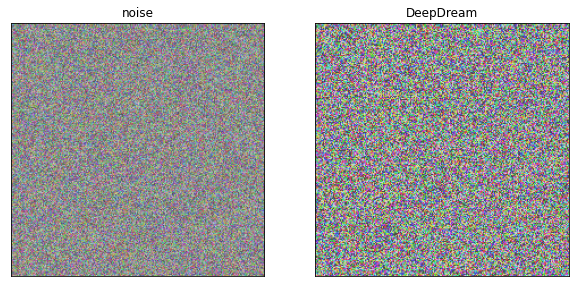

In [41]:
name = 'mixed4d_3x3_bottleneck_pre_relu'
channel = 30
layer_output = graph.get_tensor_by_name("import/%s:0" % name)

img_noise = np.random.uniform(size=(224, 224, 3)) + 100.0

img = render_naive(layer_output[:,:,:,channel], img_noise, iter_n=20)

fig = plt.gcf()
fig.set_size_inches(10, 5)

ax1 = plt.subplot(1, 2, 1)
ax1.imshow(normalize_image(img_noise))
ax1.set_title('noise')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = plt.subplot(1, 2, 2)
ax2.imshow(normalize_image(img))
ax2.set_title('DeepDream')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

输入图像生成 DeepDream

In [42]:
name = 'mixed4c'
layer_output = graph.get_tensor_by_name("import/%s:0" % name)

img0 = PIL.Image.open('./data/mountain1.jpg')
img0 = np.float32(img0)

dis = './data/mountain1_deepdream.jpg'
img = render_deepdream(dis, tf.square(layer_output), img0)

img_saved:./data/mountain1_deepdream.jpg


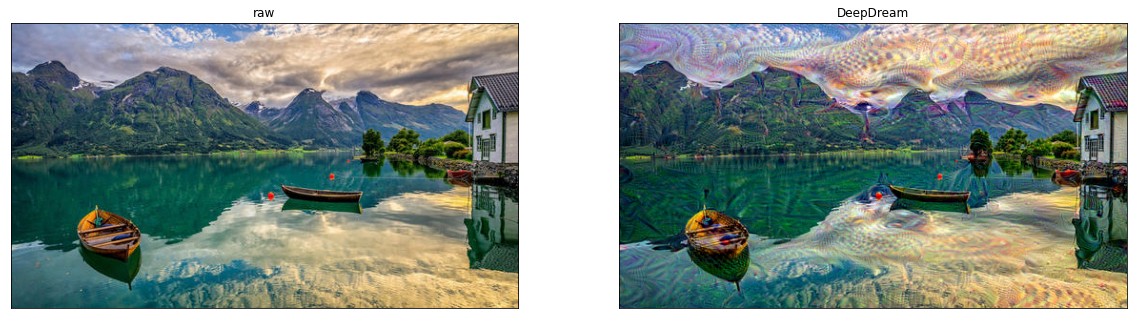

In [43]:
fig = plt.gcf()
fig.set_size_inches(20, 10)

ax1 = plt.subplot(1, 2, 1)
ax1.imshow(img0.astype('uint8'))
ax1.set_title('raw')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = plt.subplot(1, 2, 2)
ax2.imshow(img.astype('uint8'))
ax2.set_title('DeepDream')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()